# Amazon Web Services Example

This notebook demonstrates buildzr's Jupyter notebook integration using an AWS deployment architecture example.

Based on the example from https://structurizr.com/dsl?example=amazon-web-services

In [1]:
from buildzr.dsl import (
    Workspace,
    Person,
    SoftwareSystem,
    Container,
    Component,
    DeploymentEnvironment,
    DeploymentGroup,
    DeploymentNode,
    InfrastructureNode,
    ContainerInstance,
    SystemContextView,
    DeploymentView,
    StyleElements,
)

## Define the Workspace

Create the software system with containers and components, then define the AWS deployment architecture.

In [2]:
with Workspace(
    "Amazon Web Services Example",
    description="An example AWS deployment architecture",
) as w:

    user = Person("User", description="An ordinary user.")

    with SoftwareSystem("X") as x:

        wa = Container("Web Application", technology="Java and Spring boot")
        db = Container("Database Schema")

        wa >> "Reads from and writes to" >> db

        with wa:
            api_layer = Component("API Layer")
            db_layer = Component("Database Layer")

            api_layer >> "Runs queries/transactions on" >> db_layer

    user >> ("Uses", "browser") >> x

    with DeploymentEnvironment("Live") as live:

        dg_region_1 = DeploymentGroup("region-1")
        dg_region_2 = DeploymentGroup("region-2")

        with DeploymentNode("Amazon Web Services") as aws:
            aws.add_tags("Amazon Web Services - Cloud")

            with DeploymentNode("ap-southeast-1") as region_ap_southeast_1:
                region_ap_southeast_1.add_tags("Amazon Web Services - Region")

                dns = InfrastructureNode(
                    "DNS Router",
                    description="Routes incoming requests based upon domain name.",
                    technology="Route 53",
                    tags={"Amazon Web Services - Route 53"}
                )

                lb = InfrastructureNode(
                    "Load Balancer",
                    description="Automatically distributes incoming application traffic.",
                    technology="Elastic Load Balancer",
                    tags={"Amazon Web Services - Elastic Load Balancer"}
                )

                dns >> ("Fowards requests to", "HTTP") >> lb

                with DeploymentNode("Autoscaling Group", tags={"Amazon Web Services - Autoscaling Group"}) as asg:
                    with DeploymentNode("Amazon EC2 - Ubuntu Server", tags={"Amazon Web Services - EC2 Instance"}):
                        lb >> "Forwards requests to" >> ContainerInstance(wa, deployment_groups=[dg_region_1])

                with DeploymentNode("Amazon RDS", tags={"Amazon Web Services - RDS Instance"}) as rds:
                    with DeploymentNode("MySQL", tags={"Amazon Web Services - RDS MySQL instance"}):
                        database_instance = ContainerInstance(db, deployment_groups=[dg_region_1])

            with DeploymentNode("us-east-1") as region_us_east_1:
                region_us_east_1.add_tags("Amazon Web Services - Region")

                dns = InfrastructureNode(
                    "DNS Router",
                    description="Routes incoming requests based upon domain name.",
                    technology="Route 53",
                    tags={"Amazon Web Services - Route 53"}
                )

                lb = InfrastructureNode(
                    "Load Balancer",
                    description="Automatically distributes incoming application traffic.",
                    technology="Elastic Load Balancer",
                    tags={"Amazon Web Services - Elastic Load Balancer"}
                )

                dns >> ("Fowards requests to", "HTTP") >> lb

                with DeploymentNode("Autoscaling Group", tags={"Amazon Web Services - Autoscaling Group"}) as asg:
                    with DeploymentNode("Amazon EC2 - Ubuntu Server", tags={"Amazon Web Services - EC2 Instance"}):
                        lb >> "Forwards requests to" >> ContainerInstance(wa, deployment_groups=[dg_region_2])

                with DeploymentNode("Amazon RDS", tags={"Amazon Web Services - RDS Instance"}) as rds:
                    with DeploymentNode("MySQL", tags={"Amazon Web Services - RDS MySQL instance"}):
                        database_instance = ContainerInstance(db, deployment_groups=[dg_region_2])

    SystemContextView(
        software_system_selector=x,
        key='x_context_00',
        description="System context of X",
    )

    DeploymentView(
        environment=live,
        key='aws-deployment-view',
        software_system_selector=x,
        title="Amazon Web Services Deployment",
        description="Deployment view of the web application on AWS",
        auto_layout='lr',
    )

    StyleElements(on=['Element'], background='#ffffff')
    StyleElements(on=['Container'], background='#ffffff')
    StyleElements(on=[wa], background='#ffffff')
    StyleElements(on=[user], shape='Person')
    StyleElements(on=[db], shape='Cylinder')

## View as JSON

Get the workspace as a dictionary for inspection.

In [3]:
# Get workspace as dictionary
data = w.to_dict()
print(f"Workspace: {data['name']}")
print(f"Description: {data['description']}")
print(f"Number of views: {len(data['views'].get('systemContextViews', [])) + len(data['views'].get('deploymentViews', []))}")

Workspace: Amazon Web Services Example
Description: An example AWS deployment architecture
Number of views: 2


In [4]:
w.to_dict()

{'id': 1,
 'name': 'Amazon Web Services Example',
 'description': 'An example AWS deployment architecture',
 'model': {'people': [{'id': '1',
    'name': 'User',
    'description': 'An ordinary user.',
    'tags': 'Element,buildzr-styleelements-0b2892fe79dc4b01832bec8cf485fd49,Person',
    'location': 'Unspecified',
    'properties': {},
    'relationships': [{'id': '9',
      'description': 'Uses',
      'tags': 'Relationship',
      'sourceId': '1',
      'destinationId': '2',
      'technology': 'browser'}]}],
  'softwareSystems': [{'id': '2',
    'name': 'X',
    'description': '',
    'location': 'Unspecified',
    'tags': 'Element,Software System',
    'containers': [{'id': '3',
      'name': 'Web Application',
      'description': '',
      'technology': 'Java and Spring boot',
      'tags': 'Element,buildzr-styleelements-528158d949d34a899dcac10132f2aa39,Container',
      'components': [{'id': '6',
        'name': 'API Layer',
        'description': '',
        'technology': '',

## View as PlantUML

Get the PlantUML source for all views.

In [5]:
# Get PlantUML source for all views
puml = w.to_plantuml_string()
for view_key, content in puml.items():
    print(f"=== {view_key} ===")
    print(content[:500] + "..." if len(content) > 500 else content)
    print()

OpenJDK 64-Bit Server VM warning: Unable to get SVE vector length on this system. Disabling SVE. Specify -XX:UseSVE=0 to shun this warning.


JVM started with JARs: /workspace/buildzr/buildzr/jars/structurizr-export.jar, /workspace/buildzr/buildzr/jars/structurizr-core.jar, /workspace/buildzr/buildzr/jars/commons-logging.jar, /workspace/buildzr/buildzr/jars/plantuml.jar
=== x_context_00 ===
@startuml
set separator none
title X - System Context

top to bottom direction

!include <C4/C4>
!include <C4/C4_Context>

Person(User, "User", $descr="An ordinary user.", $tags="", $link="")
System(X, "X", $descr="", $tags="", $link="")

Rel(User, X, "Uses", $techn="browser", $tags="", $link="")

SHOW_LEGEND(true)
@enduml

=== aws-deployment-view ===
@startuml
set separator none
title Amazon Web Services Deployment

top to bottom direction

!include <C4/C4>
!include <C4/C4_Context>
!include <C4/C4_Container>
!include <C4/C4_Deployment>

Deployment_Node(Default.AmazonWebServices, "Amazon Web Services", $type="", $descr="", $tags="", $link="") {
  Deployment_Node(Default.AmazonWebServices.useast1, "us-east-1", $type="", $descr="", $tags=""

## Render as SVG

Render all views as SVG diagrams and display them inline.

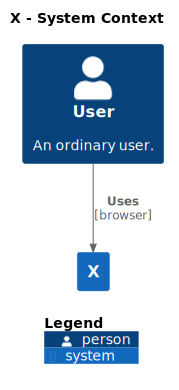

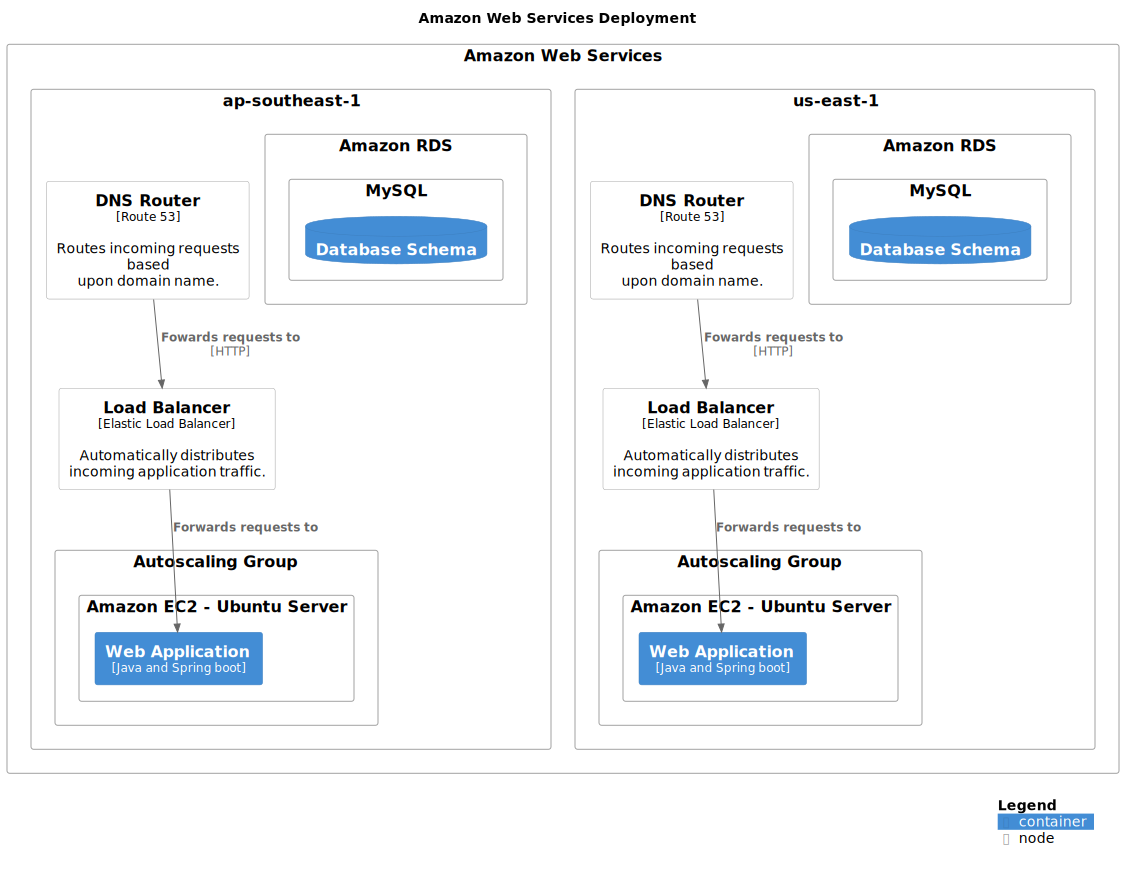

In [6]:
from IPython.display import SVG, display, HTML

# Get SVG content for all views
svgs = w.to_svg_string()

for view_key, svg_content in svgs.items():
    display(HTML(f"<h3>{view_key}</h3>"))
    display(SVG(svg_content))

## Alternative: Use _repr_html_ for automatic display

Just evaluate the workspace object to see all views rendered as SVGs.


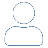

In [7]:
# Simply evaluate the workspace - Jupyter will call _repr_html_() automatically
w